In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
import seaborn as sns

In [3]:
from results.good.run_0.conf import *

In [4]:
sns.set_style('whitegrid')

In [5]:
RESULT_DIR = "./results/good/run_0"

In [6]:
df = pd.read_csv(RESULT_DIR + '/model_vars.csv').set_index(['run', 'step'])
df.head()

tech_optimists  tech_pessimists  price   nf  technical_fraction  \
run step                                                                    
0   0                  5               44   9.99  451               0.098   
    1                  5               51   9.98  444               0.112   
    2                  5               60   9.97  435               0.130   
    3                  5               69   9.96  426               0.148   
    4                  5               44   9.95  451               0.098   

             slope  opinion_index   edt     edf      ed           ept  \
run step                                                                
0   0     0.000000      -0.795918 -0.78  0.0451 -0.7349  4.004004e-07   
    1     0.000000      -0.821429 -0.92  0.0888 -0.8312  8.016032e-07   
    2    -0.333333      -0.846154 -1.10  0.1305 -0.9695 -1.671561e-02   
    3    -0.500000      -0.864865 -1.28  0.1704 -1.1096 -2.509880e-02   
    4    -0.600000      -0.795918 -0.78  0.2255 -0.5545 -3.014874e-02   

               epf  U_strategy  p_trans_strategy  
run step                                          
0   0     0.000751   -0.000375          0.019992  
    1     0.001503   -0.000751          0.019985  
    2     0.002257   -0.009486          0.019811  
    3     0.003012   -0.014055          0.019721  
    4     0.003769   -0.016959          0.019664

In [7]:
moving_df = df.groupby('run').transform(lambda x: x.rolling(25, 1).mean())
average_df = df.groupby('step').mean()

<AxesSubplot:xlabel='step', ylabel='technical_fraction'>

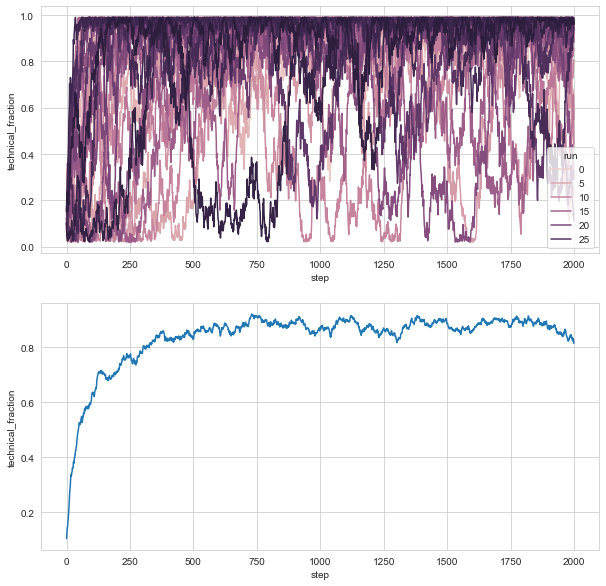

In [8]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
sns.lineplot(data=df, y='technical_fraction', x='step', hue='run', ax=axs[0])
sns.lineplot(data=average_df, y='technical_fraction', x='step', ax=axs[1])


<AxesSubplot:xlabel='step', ylabel='technical_fraction'>

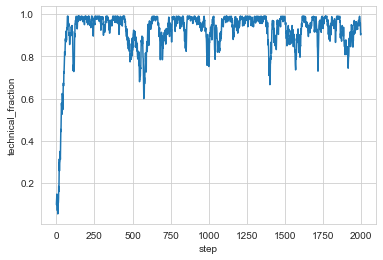

In [9]:
sns.lineplot(data=df.loc[0], y='technical_fraction', x='step')

1.0 0.0


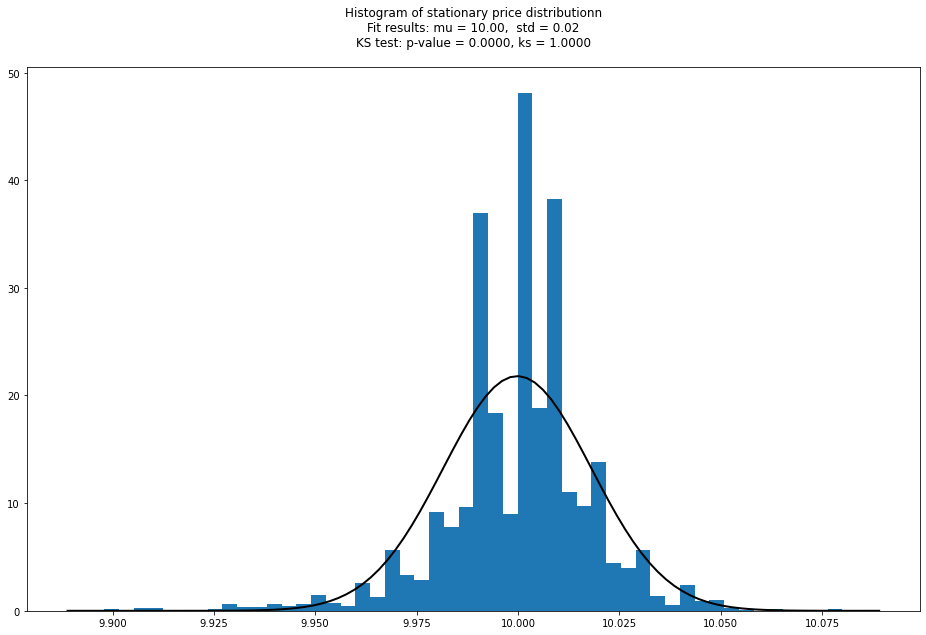

In [11]:
final_price_series = pd.Series(dtype=float)
for df in df_list:
    final_price_series = final_price_series.append(df.price.iloc[800:])

fig , ax = plt.subplots(1,1, figsize=(16, 10))
array = final_price_series.to_numpy()
mu, std = norm.fit(array)

ks_statistic, p_value = kstest(array, 'norm')
print(ks_statistic, p_value)

n, bins, patches = ax.hist(final_price_series, 50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

ax.set_title(f'Histogram of stationary price distributionn\n' + 
    f'Fit results: mu = {mu:.2f},  std = {std:.2f}\n' +
    f'KS test: p-value = {p_value:.4f}, ks = {ks_statistic:.4f}\n'
)

fig.savefig(f'{RESULT_DIR}/immagini/Histogram of stationary price distribution',facecolor='white', transparent=False)



0.2856635624039858 0.0


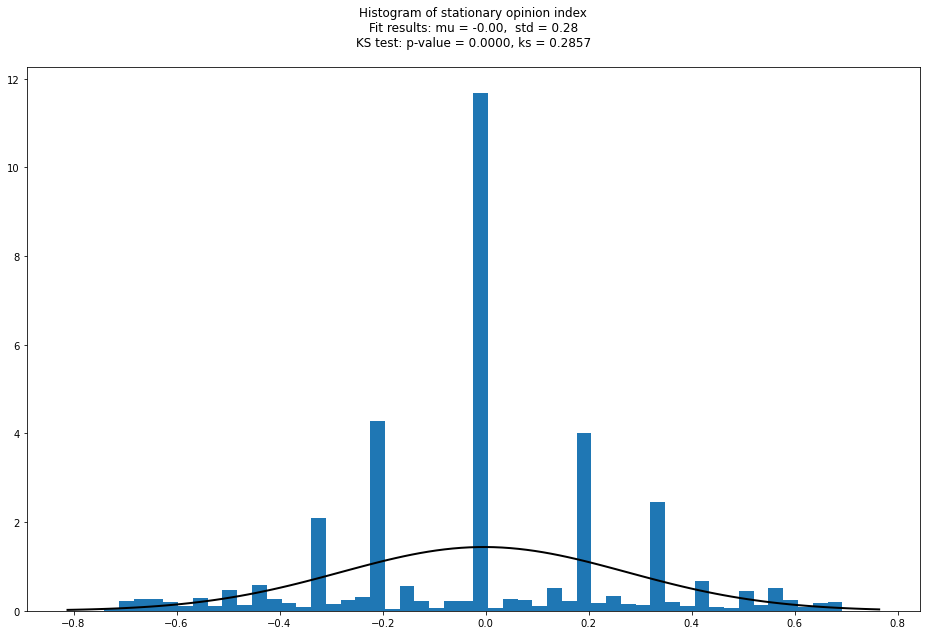

In [12]:
opinion_series = pd.Series(dtype=float)
for df in df_list:
    if 'opinion_index' in df.columns:
        opinion_series = opinion_series.append(df.opinion_index.iloc[800:])

    else:
        opinion_series = opinion_series.append((df.tech_optimists.iloc[800:] - df.tech_pessimists.iloc[800:])/(df.tech_optimists.iloc[800:] + df.tech_pessimists.iloc[800:]))

fig , ax = plt.subplots(1,1, figsize=(16, 10))
array = opinion_series.to_numpy()
mu, std = norm.fit(array)

ks_statistic, p_value = kstest(array, 'norm')
print(ks_statistic, p_value)

n, bins, patches = ax.hist(opinion_series, 50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

ax.set_title(f'Histogram of stationary opinion index\n' + 
    f'Fit results: mu = {mu:.2f},  std = {std:.2f}\n' +
    f'KS test: p-value = {p_value:.4f}, ks = {ks_statistic:.4f}\n'
)

fig.savefig(f'{RESULT_DIR}/immagini/Histogram of stationary opinion index distribution',facecolor='white', transparent=False)


0.5079783137169019 0.0


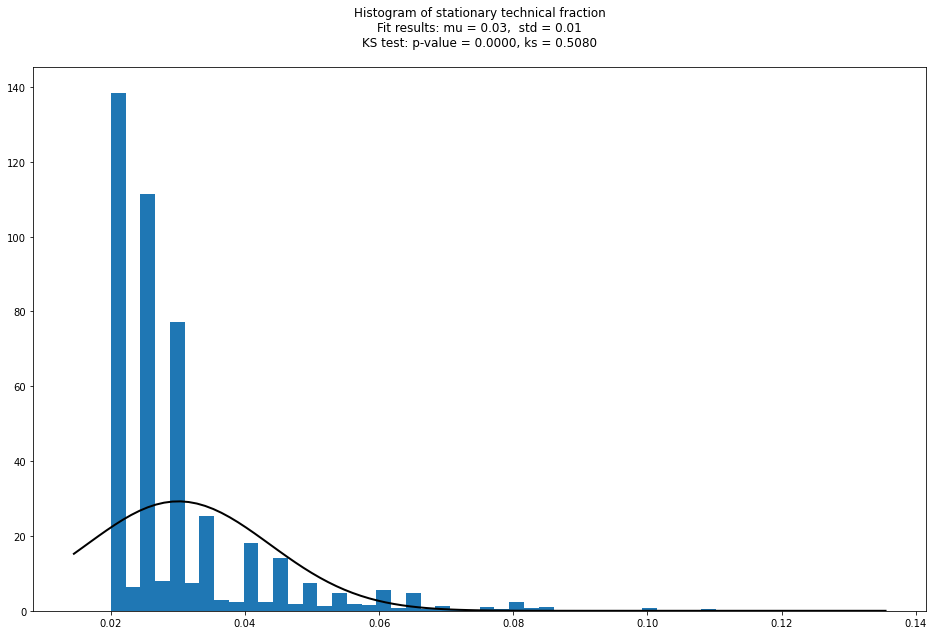

In [13]:
fraction_series = pd.Series(dtype=float)
for df in df_list:
    fraction_series = fraction_series.append(df.technical_fraction[800:])

fig , ax = plt.subplots(1,1, figsize=(16, 10))
array = fraction_series.to_numpy()
mu, std = norm.fit(array)

ks_statistic, p_value = kstest(array, 'norm')
print(ks_statistic, p_value)

n, bins, patches = ax.hist(fraction_series, 50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

ax.set_title(f'Histogram of stationary technical fraction\n' + 
    f'Fit results: mu = {mu:.2f},  std = {std:.2f}\n' +
    f'KS test: p-value = {p_value:.4f}, ks = {ks_statistic:.4f}\n'
)

fig.savefig(f'{RESULT_DIR}/immagini/Histogram of stationary technical fraction distribution',facecolor='white', transparent=False)

In [14]:

# for model_df in df_list:

#     edt = (model_df.tech_optimists - model_df.tech_pessimists) * CONST['tc']  # excess technical demand
#     edf = model_df.nf * CONST['gamma'] * (CONST['pf'] - model_df.price)

#     model_df["edt"] = edt
#     model_df["edf"] = edf
#     model_df["ed"]  = edt + edf

#     fig , ax = plt.subplots(2,1, figsize=(16, 10))
#     ax[0].plot(model_df.price)
#     ax[1].plot(model_df.edf, label="edf")
#     ax[1].plot(model_df.edt, label="edt")
#     ax[1].plot(model_df.ed, label="ed")
#     ax[1].legend()
# for model_df in df_list:
#     ept = (CONST['r'] + model_df.slope / CONST['v2']) / model_df.price - CONST['R']
#     epf = CONST['s'] * abs((model_df.price - CONST['pf']) / model_df.price)

#     U = CONST['a3'] * (ept - epf)
#     p_transition = CONST['v2'] * model_df.tech_optimists / CONST['N'] * np.exp(U) * CONST['DT']
#     fig, ax = plt.subplots(2, 1, figsize=(16,10))

#     ax[0].plot(p_transition)
#     ax[1].plot(ept, label="ept")
#     ax[1].plot(epf, label="epf")
#     ax[1].plot(U, label="U")
#     ax[1].legend()